In [7]:
import pandas as pd

json_file_path = "campaigns_with_emotionally_charged_data.json"
campaigns = pd.read_json(json_file_path)

campaigns.columns

Index(['_id', 'URL', 'Category', 'image', 'GoalAmount', 'Organizer',
       'Description', 'Updates', 'Comments', 'Created', 'Data_created_on',
       'success', 'Title', 'RaisedAmount', 'DominantEmotion', 'EmotionScore',
       'EmotionallyCharged'],
      dtype='object')

In [9]:
campaigns.head()

,_id,URL,Category,image,GoalAmount,Organizer,Description,Updates,Comments,Created,Data_created_on,success,Title,RaisedAmount,DominantEmotion,EmotionScore,EmotionallyCharged
0,{'$oid': '61e5fb7e1ad7d6fcca9ad8ac'},https://www.gofundme.com/f/1-dollar-to-1-milli...,Community & Neighbors,"background-image: url(""https://images.gofundme...",1000000,"{'Organizer_name': 'Courteney Ridgeway', 'Orga...",Courteney Ridgeway is organizing this fundrais...,[],"[{'donated_amount': 20, 'comment': 'I believe ...","Created November 10, 2021",{'$date': {'$numberLong': '1642444078735'}},0,1 dollar to 1 million empowerment or experiment..,383.0,sadness,0.925306,True
1,{'$oid': '61e764a53d2cac2f33b659f6'},https://www.gofundme.com/f/1-girl-1-calculator,Education & Learning,"background-image: url(""https://images.gofundme...",2600,"{'Organizer_name': 'Macy Hill', 'Organizer_des...",Macy Hill is organizing this fundraiser on beh...,"[December 5, 2021, by Christine Hill, Benefici...","[{'donated_amount': 400, 'comment': 'As part o...","Created September 6, 2021",{'$date': {'$numberLong': '1642536533312'}},0,1 Girl 1 Calculator,1680.0,fear,0.866772,True
2,{'$oid': '61dfa752697f4b953f55a291'},https://www.gofundme.com/f/1-year-of-event-pro...,"Creative Arts, Music & Film","background-image: url(""https://images.gofundme...",3500,"{'Organizer_name': 'Herine Palacios', 'Organiz...",Herine Palacios is organizing this fundraiser....,[],"[{'donated_amount': 5, 'comment': 'lets gooooo...","Created November 4, 2021",{'$date': {'$numberLong': '1642029314823'}},0,1 year of event programming,1120.0,joy,0.899199,True
3,{'$oid': '61e206bb1ad7d6fcca9ac17b'},https://www.gofundme.com/f/10-secrets-to-stopp...,Environment,"background-image: url(""https://images.gofundme...",277477,"{'Organizer_name': 'Richard Eckstein', 'Organi...",Richard Eckstein is organizing this fundraiser...,[],[],"Created September 9, 2021",{'$date': {'$numberLong': '1642184811786'}},0,Secrets to Stopping Climate Change,10.0,neutral,0.830493,False
4,{'$oid': '61e637933d2cac2f33b654a2'},https://www.gofundme.com/f/10-thursday-with-gpbr,Non-Profits & Charities,"background-image: url(""https://images.gofundme...",1000,"{'Organizer_name': 'Heather Horlor', 'Organize...",Heather Horlor is organizing this fundraiser t...,[],[],"Created November 8, 2021",{'$date': {'$numberLong': '1642459459232'}},0,$10 Thursday with GPBR!,260.0,neutral,0.714147,False


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis
# print("Basic Dataset Info:")
# print(campaigns.info())

# print("\nSummary Statistics:")
# print(campaigns.describe())

# Count of Emotionally Charged vs Neutral campaigns
emotionally_charged_counts = campaigns["EmotionallyCharged"].value_counts()
print("\nEmotionally Charged vs Neutral Counts:")
print(emotionally_charged_counts)



# # Success rate comparison for Emotionally Charged vs Neutral campaigns
success_rates = campaigns.groupby("EmotionallyCharged")["success"].mean() * 100
print("\nSuccess Rates by Emotionally Charged Category:")
print(success_rates)


Emotionally Charged vs Neutral Counts:
False    13977
True      8016
Name: EmotionallyCharged, dtype: int64

Success Rates by Emotionally Charged Category:
EmotionallyCharged
False    21.843028
True     23.216068
Name: success, dtype: float64


/var/folders/82/w5q677wj6p74y06sysl9y6c40000gn/T/ipykernel_68492/1208689289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rates.index, y=success_rates.values, palette="coolwarm")


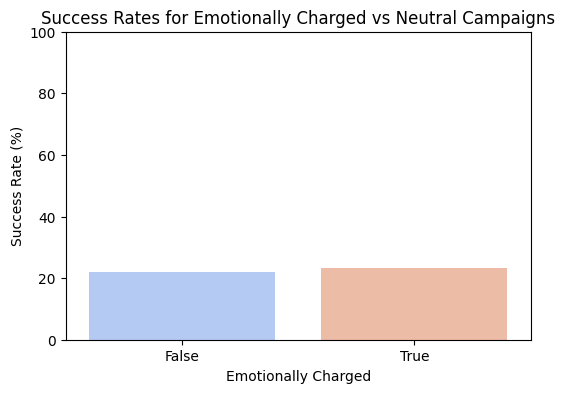

In [13]:
# Visualizing success rates
plt.figure(figsize=(6, 4))
sns.barplot(x=success_rates.index, y=success_rates.values, palette="coolwarm")
plt.xlabel("Emotionally Charged")
plt.ylabel("Success Rate (%)")
plt.title("Success Rates for Emotionally Charged vs Neutral Campaigns")
plt.ylim(0, 100)
plt.show()

/var/folders/82/w5q677wj6p74y06sysl9y6c40000gn/T/ipykernel_68492/4290999371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="EmotionallyCharged", y="RaisedAmount", data=campaigns, palette="coolwarm")


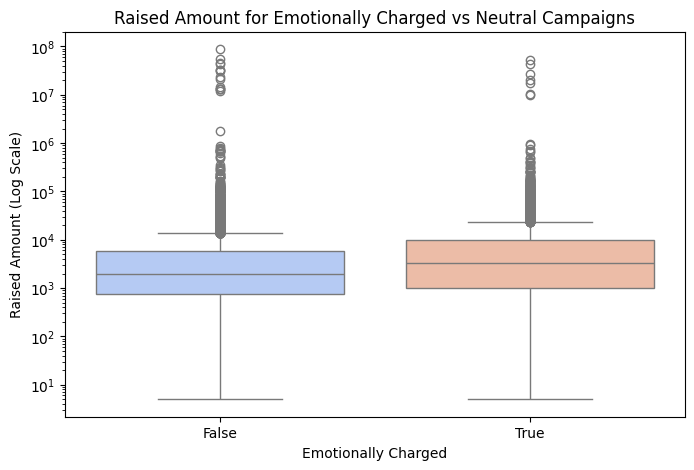

In [14]:
# Boxplot to compare RaisedAmount for Emotionally Charged vs Neutral campaigns
plt.figure(figsize=(8, 5))
sns.boxplot(x="EmotionallyCharged", y="RaisedAmount", data=campaigns, palette="coolwarm")
plt.yscale("log")  # Log scale to better visualize outliers
plt.xlabel("Emotionally Charged")
plt.ylabel("Raised Amount (Log Scale)")
plt.title("Raised Amount for Emotionally Charged vs Neutral Campaigns")
plt.show()

/var/folders/82/w5q677wj6p74y06sysl9y6c40000gn/T/ipykernel_68492/2830781416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="success", data=campaigns, palette="coolwarm")


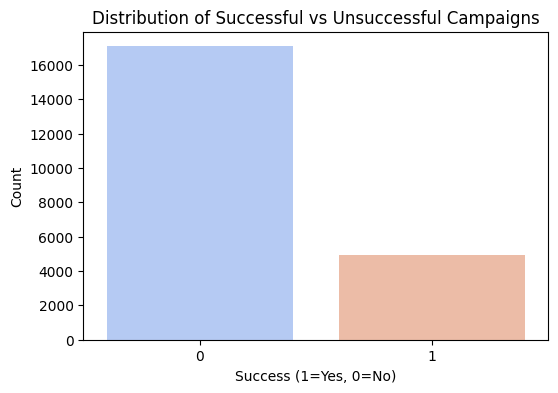

In [15]:
# Countplot for campaign success distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="success", data=campaigns, palette="coolwarm")
plt.xlabel("Success (1=Yes, 0=No)")
plt.ylabel("Count")
plt.title("Distribution of Successful vs Unsuccessful Campaigns")
plt.show()

In [ ]:
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# **1. Chi-Square Test for Association Between Emotional Charge and Success**
# Create a contingency table
contingency_table = pd.crosstab(campaigns["EmotionallyCharged"], campaigns["success"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print Chi-Square Test Results
print("\nChi-Square Test for Independence")
print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")
print("Expected Frequency Table:\n", expected)



Chi-Square Test for Independence
Chi2 Statistic: 5.4562, p-value: 0.0195, Degrees of Freedom: 1
Expected Frequency Table:
 [[10854.05278952  3122.94721048]
 [ 6224.94721048  1791.05278952]]


In [22]:
# **2. Logistic Regression to Predict Success Based on Emotionally Charged Language**
# Convert categorical variables if necessary
campaigns["EmotionallyCharged"] = campaigns["EmotionallyCharged"].astype(int)  # Convert True/False to 1/0

# Fit logistic regression model
logit_model = smf.logit("success ~ EmotionallyCharged + GoalAmount", data=campaigns).fit()

# Display logistic regression results
print("\nLogistic Regression Results:")
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.521485
         Iterations 13

Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                21993
Model:                          Logit   Df Residuals:                    21990
Method:                           MLE   Df Model:                            2
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                 0.01833
Time:                        17:25:22   Log-Likelihood:                -11469.
converged:                       True   LL-Null:                       -11683.
Covariance Type:            nonrobust   LLR p-value:                 1.020e-93
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0812      0.023    -47.143      0.00

/Users/rahatibnrafiq/miniforge3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/rahatibnrafiq/miniforge3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [23]:
# **3. Compute Odds Ratio**
odds_ratio = np.exp(logit_model.params["EmotionallyCharged"])
print(f"\nOdds Ratio for Emotionally Charged Campaigns: {odds_ratio:.4f}")


Odds Ratio for Emotionally Charged Campaigns: 1.1281


In [24]:
# **4. Effect Size Calculation**
# Compute Cohen's d for effect size estimation
def compute_cohens_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    pooled_std = np.sqrt((std1**2 + std2**2) / 2)
    return (mean1 - mean2) / pooled_std

cohens_d = compute_cohens_d(
    campaigns[campaigns["EmotionallyCharged"] == 1]["success"],
    campaigns[campaigns["EmotionallyCharged"] == 0]["success"],
)

print(f"\nCohen's d Effect Size: {cohens_d:.4f}")


Cohen's d Effect Size: 0.0329


In [31]:
# # **5. Display Key Statistical Analysis Outputs**
# tools.display_dataframe_to_user(name="Statistical Analysis Results", dataframe=pd.DataFrame({
    
#     "p-value": [p],
#     "Degrees of Freedom": [dof],
#     "Odds Ratio": [odds_ratio],
#     "Cohen's d": [cohens_d]
# }))
print(f"Chi2 Statistic : {chi2}" )
print(f"Degrees of Freedom: {dof}")
print(f"Odds Rtio: {odds_ratio}")
print(f"Cohen's d: {cohens_d}")

Chi2 Statistic : 5.456243831625015
Degrees of Freedom: 1
Odds Rtio: 1.1280723232609815
Cohen's d: 0.03286821528040921
